In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
plt.rc('animation', html='jshtml')

In [2]:
class walker():
    def __init__(self) -> None:
        self.r = np.array([0.0,0.0])
        self.col = "C0"

    def move(self):
        v = np.random.rand()*2*np.pi
        self.r+= np.array([np.cos(v), np.sin(v)])

    def distance(self):
        return np.linalg.norm(self.r)
    
def plot_all_walkers(ax,walkers_to_plot):
    rs = np.array([w.r for w in walkers_to_plot])
    artist = ax.scatter(rs[:,0], rs[:,1],
                  color=[w.col for w in walkers_to_plot])
    return artist

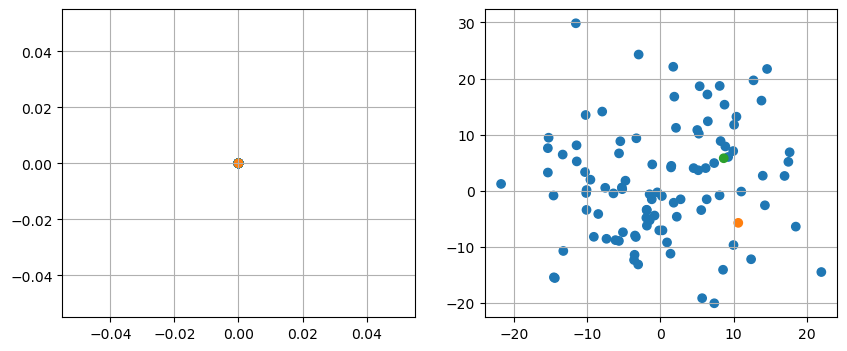

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
walkers = [walker() for i in range(100)]
walkers[-1].col = "C1"
walkers[-2].col = "C2"

for ax in axs:
    ax.grid()

plot_all_walkers(axs[0], walkers)

steps = 200

d_mean = np.zeros(steps)

for i in range(steps):
    for w in walkers:
        w.move()
    dist = [w.distance() for w in walkers]
    d_mean[i] = np.mean(dist)
plot_all_walkers(axs[1], walkers)


C:\Users\karst\AppData\Local\Temp\ipykernel_4284\94222916.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[1].plot(np.log10(np.arange(0,len(d_mean), 1)), np.log10(d_mean))


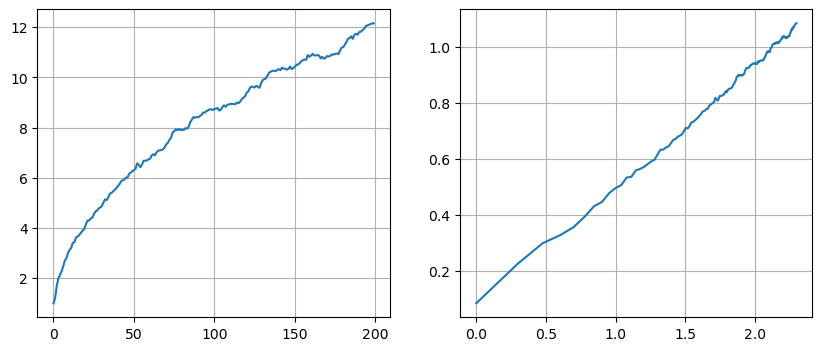

In [4]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
for ax in axs:
    ax.grid()
axs[0].plot(np.arange(0,len(d_mean), 1), d_mean)
axs[1].plot(np.log10(np.arange(0,len(d_mean), 1)), np.log10(d_mean))

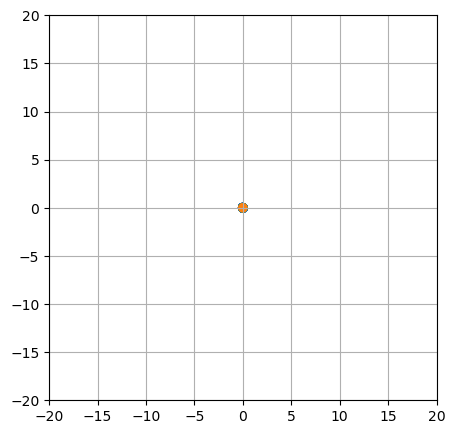

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
walkers = [walker() for i in range(100)]
walkers[-1].col = "C1"
walkers[-2].col = "C2"
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
ax.grid()

artist = plot_all_walkers(ax=ax, walkers_to_plot=walkers)



In [8]:
def update(i):
    for w in walkers:
        w.move()
        #print(w.r)
    artist.set_offsets([w.r for w in walkers])
    return [artist]

N = 100

anim = animation.FuncAnimation(fig,
                               update,
                               frames=N,
                               interval=75,
                               blit=True)
anim


In [ ]:
#WHY DOES MY ANIMATION NOT START AT 0'th ITERATION PLOTTING ALL WALKERS IN CENTER?